In [1]:
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
import nltk
from nltk.tokenize.casual import TweetTokenizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from matplotlib import pyplot as plt
from scipy.sparse import csr_matrix
from nltk.collocations import *
pd.set_option('display.max_colwidth', 200)

In [155]:
f = pd.read_csv("./hillary-clinton-emails/Emails.csv", index_col = "Id")
f[:][:1]

,DocNumber,MetadataSubject,MetadataTo,MetadataFrom,SenderPersonId,MetadataDateSent,MetadataDateReleased,MetadataPdfLink,MetadataCaseNumber,MetadataDocumentClass,...,ExtractedTo,ExtractedFrom,ExtractedCc,ExtractedDateSent,ExtractedCaseNumber,ExtractedDocNumber,ExtractedDateReleased,ExtractedReleaseInPartOrFull,ExtractedBodyText,RawText
Id,,,,,,,,,,,,,,,,,,,,,
1,C05739545,WOW,H,"Sullivan, Jacob J",87,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739545/C05739545.pdf,F-2015-04841,HRC_Email_296,...,NaN,"Sullivan, Jacob J <Sullivan11@state.gov>",NaN,"Wednesday, September 12, 2012 10:16 AM",F-2015-04841,C05739545,05/13/2015,RELEASE IN FULL,NaN,UNCLASSIFIED\nU.S. Department of State\nCase No. F-2015-04841\nDoc No. C05739545\nDate: 05/13/2015\nSTATE DEPT. - PRODUCED TO HOUSE SELECT BENGHAZI COMM.\nSUBJECT TO AGREEMENT ON SENSITIVE INFORMA...


In [157]:
import random
data = pd.DataFrame()
data = f
data = data.fillna("")
data["rand_row"] = [str(random.randint(10000, 20000)) for i in xrange(len(data))]
data["new_row"] = data["MetadataSubject"] + "\n" + data["rand_row"] + "\n" +\
        data["MetadataFrom"].astype(str) + "\n" + data["rand_row"] + "\n" + data["MetadataTo"]\
        + "\n" + data["rand_row"] + "\n" + data["ExtractedBodyText"]

In [158]:
def get_features(ngram_range, column_name, stop_words = None, verbose = True):
    
    vectorizer = TfidfVectorizer(ngram_range=ngram_range, stop_words = stop_words, analyzer="word")
    features = vectorizer.fit_transform(data[column_name])
    
    feature_names = np.array(vectorizer.get_feature_names())
    feature_sum = np.array(map(int, np.matrix(csr_matrix.sum(features, axis = 0)).tolist()[0]))
    table = pd.DataFrame()
    table["names"] = feature_names
    table["sum"] = feature_sum
    table["index"] = range(len(feature_names))
    table = table.sort_values(by="sum")[::-1]
    if(verbose):
        print "ngram_range =", ngram_range, "stop_words = ", stop_words
        print "# of features=", len(vectorizer.get_feature_names())
        print "\nMost common %d-grams:"%ngram_range[1] + "\n"
        print table[:5]
    return table, vectorizer, features

In [159]:
table, vectorizer, features = get_features((2,2), column_name="new_row")

ngram_range = (2, 2) stop_words =  None
# of features= 296319

Most common 2-grams:

                 names  sum   index
243140       state gov  157  243140
28624      abedin huma  126   28624
173180    mills cheryl  121  173180
247365  sullivan jacob   78  247365
28648    abedinh state   59   28648


In [160]:
table, vectorizer, features = get_features((2,2), column_name="new_row", stop_words="english")

ngram_range = (2, 2) stop_words =  english
# of features= 271712

Most common 2-grams:

                 names  sum   index
234812       state gov  178  234812
29444      abedin huma  140   29444
165259    mills cheryl  133  165259
239821  sullivan jacob   87  239821
29473    abedinh state   67   29473


In [90]:
column_of_data = "new_row"

In [91]:
finder = BigramCollocationFinder.from_words("".join(data[column_of_data].values))
bigram_measures = nltk.collocations.BigramAssocMeasures()
finder.nbest(bigram_measures.pmi, 10)

[('\xbf', '\xbd'),
 ('\xef', '\xbf'),
 (']', '['),
 ('f', 'f'),
 ('!', '!'),
 ('z', 'z'),
 ('j', 'j'),
 ('y', '>'),
 ('q', 'u'),
 ('>', '[')]

In [81]:
KMeans?

In [150]:
from sklearn.cluster.hierarchical import AgglomerativeClustering
from sklearn.cluster import KMeans


table, vectorizer, features = get_features((2,2), column_of_data, stop_words="english")
print "\n", "==========================", "\n"
#model = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='complete')
num_clusters = 10
model = KMeans(n_clusters=num_clusters, n_jobs=-1)
model.fit(features)
preds = model.predict(features)
print "№_of_cluster, amount"
for i in xrange(num_clusters):
    print i, (preds == i).sum()

ngram_range = (2, 2) stop_words =  english
# of features= 271683

Most common 2-grams:

                 names  sum   index
234783       state gov  178  234783
29424      abedin huma  140   29424
165223    mills cheryl  133  165223
239792  sullivan jacob   87  239792
29453    abedinh state   67   29453


№_of_cluster, amount
0 1286
1 54
2 997
3 74
4 2763
5 703
6 800
7 502
8 492
9 274


In [153]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


Computing PCA projection


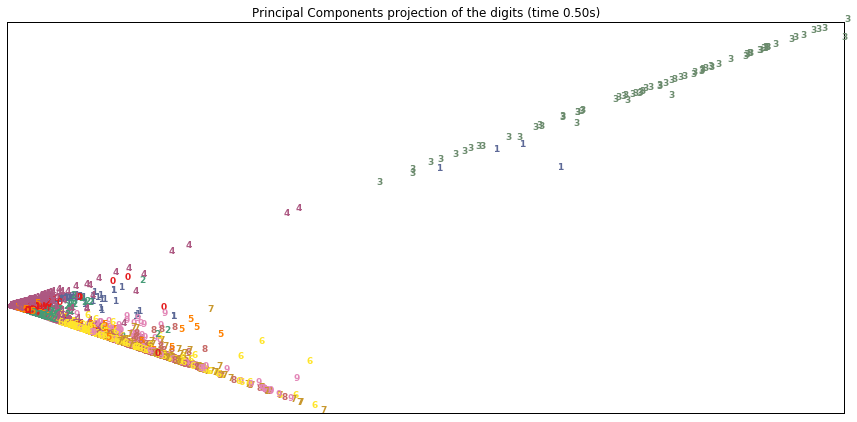

In [154]:
from time import time

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import offsetbox
from sklearn import (manifold, datasets, decomposition, ensemble,
                     discriminant_analysis, random_projection)

X = features
y = preds
n_samples, n_features = features.shape
n_neighbors = 30
def plot_embedding(X, title=None):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)

    plt.figure(figsize=(15,7))
    ax = plt.subplot(111)
    for i in range(X.shape[0]):
        color = y[i] * 1.0 / num_clusters
        plt.text(X[i, 0], X[i, 1], str(y[i]),
                 color=plt.cm.Set1(color),
                 fontdict={'weight': 'bold', 'size': 9})
    plt.xticks([]), plt.yticks([])
    if title is not None:
        plt.title(title)

        
        
print("Computing PCA projection")
t0 = time()
X_pca = decomposition.TruncatedSVD(n_components=2).fit_transform(X)
plot_embedding(X_pca,
               "Principal Components projection of the digits (time %.2fs)" %
               (time() - t0))

plt.show()

никакой другой embedding у меня просто не посчитался

In [152]:
distances = pd.DataFrame(model.transform(features))
print "closest e-mail for each cluster"
print "format:Subject FROM TO\nHere we are:"
amount_of_best_to_print = 3
for i in xrange(num_clusters):
    cur_best = distances[distances.columns[i]][preds == i].sort_values(distances.columns[0])
    best_i = cur_best.index[:amount_of_best_to_print]
    print "===========================================================\n cluster #%d"%i
    for j in xrange(min(amount_of_best_to_print, len(cur_best))):
        arr = np.array(data[column_of_data].iloc[best_i[j]].split("\n"))
        if(len(arr) >= 7):
            print "\n", arr[[0,2,4,6]]
        else:
            print "\n", arr
        print "\n==================="

closest e-mail for each cluster
format:Subject FROM TO
Here we are:
 cluster #0

['DONE' 'Abedin, Huma' 'H' '']


['FOR ' 'Abedin, Huma' 'H' '']


['HOLBROOKE ASKING TO TALK TO YOU.' 'Abedin, Huma' 'H' '']

 cluster #1

['CGI DRAFT V3 092212.DOCX' 'Sullivan, Jacob J' 'H' 'B5']


['SPEECH DRAFT FOR FRIDAY AT CSIS' 'Schwerin, Daniel B' 'H'
 "Madam Secretary, here is our latest draft of Friday's speech. It's long \xe2\x80\x94 about 30 minutes in this version \xe2\x80\x94 but if"]


['BENHAZI/PROTEST STATEMENTS' 'Sullivan, Jacob J' 'H'
 'Attached is full compilation. You never said spontaneous or characterized the motives. in fact you were careful in your']

 cluster #2

['FWD:' 'Mills, Cheryl' 'Mills, Cheryl' 'FYI']


['ISSA PLANS HUNDREDS OF HEARINGS' 'Mills, Cheryl D' 'Mills, Cheryl D'
 'Mills, Cheryl D <MillsCD@state.gov>']


['WYNN RESORTS AS SPONSOR' 'Mills, Cheryl D' 'H'
 'Mills, Cheryl D <MillsCD@state.gov>']

 cluster #3

['MINI SCHEDULE 8/17/10 TUESDAY' 'Jiloty, Lauren C' 'H'
 '8

Итог работы: В качестве данных я решил взять три поля - subject,from,to,bodyText. Я пробовал разные варианты - сырой текст, только тело письма, разные комбинации, получалось по ощущениям хуже, hfзбиение по классам было очень неравномерно. В итоге остановился на этом, как на довольно показательной комбинации. AgglomerativeClustering у меня не посчитался, очень долго, оставил KMeans. Число кластеров выбрал так, чтобы каждый был довольно представительным, в остальном более-менее случайно. В качестве иллюстрации вывожу проекцию на полскость с помощью pca, в принципе, видно, что довольно неплохо они кластеризованы, так же вывожу несколько самых близких объектов к центрам каждого класса. Как правило, у них совпадают получатели/отправители, но один раз я натыкался на письма по аргентине. Здесь смена CountVectorizer на TfIdfVectorizer ничего не меняет. В принципе, достаточно интерпретируемые результаты, ожно жалко - что сгруппировались больше по мета-даным, нежели чем по сути писем. Да, с коллокацией биграмм я чего-то не разобрался, я так понял, он мне коллокацию символов выводит сейчас.